# <font size="7"> **Assignment-6**</font>
I hope this assignment will give you clarity on how mathematical models like **Multilayer Perceptrons (MLP)** can be made from scratch using **PyTorch** & can be used to solve complex, non-linear geometric problems **without relying on black-box libraries**.

---
# ⚫ **Mission Critical: The Exclusion Zone Protocol**

**Date:** Year 2142  
**Location:** Exoplanet *Kepler-186f*   **Clearance:** IITians

---

### **⚫ The Story**
Humanity has colonized the distant exoplanet *Kepler-186f*. While the surface is habitable, the planet's magnetic core is unstable. The **Global Defense Council (GDC)** has identified a dangerous phenomenon known as the **"Radiation Ring."**

Sensors indicate that the safe zones on the planet follow a peculiar geometry:
* ⚫ **The Core Zone:** Distance $< 2$ km from the colony center (Safe).
* ⚫ **The Outer Wilds:** Distance $> 4$ km from the colony center (Safe).
* ⚫ **The Dead Zone:** The region **between 2 km and 4 km** is flooded with lethal gamma radiation.

Your engineering team has deployed **3,000 sensor drones** across the colony to map this danger. Each drone reports its coordinates $(x, y)$ and a binary label:
* `1`: Radiation Detected (Dead Zone)
* `0`: Safe Zone

 **⚫ The Problem:** The sensors are cheap and prone to interference. Approximately **5%** of the drones are malfunctioning and reporting the wrong safety status (noise). The GDC mainframe is a legacy system that forbids the use of modern "Neural Libraries" (i.e., you cannot use `torch.nn` or `torch.optim`). You must build a **Multi-Layer Perceptron (MLP) from scratch** to filter out the noise and mathematically define the Exclusion Zone boundaries using **PyTorch**. ( Hint: You know this is a binary classification problem, which Loss function would you use?? )

---

### **⚫ Your Objective**

1.  **Initialize the System:** Use your **Group Number** as the random seed. This ensures your team works on a unique sensor distribution pattern.
2.  **Architect the Filter:** Construct a neural network with **3 hidden layers** (16 neurons each) to learn the non-linear "donut" shape of the Dead Zone.
3.  **Manual Calibration:** You cannot use auto-optimizers. You must manually calculate the gradients (Backpropagation) and update the system weights using **Gradient Descent**.
4.  **Verify Integrity:** Split your sensor data (70% training, 30% validation). Prove that your system doesn't just memorize the malfunctioning sensors (overfitting) but actually learns the geometric shape of the Dead Zone.

---

## ⚫ Engineering Constraints (Read Carefully)

**1. Restricted Modules**
*  **Forbidden:** You are strictly forbidden from importing `torch.nn` (Layers/Loss) or `torch.optim` (Optimizers).
*  **Allowed:** `import torch`, `import matplotlib.pyplot`, `import pandas`, `import numpy`, using `sklearn`.


**2. The Mechanics**
* **Forward Pass:** Must be implemented using raw matrix multiplication (`torch.matmul`) and bias addition.
* **Backward Pass:** You **MAY** use `loss.backward()` to compute gradients automatically (Autograd).
* **Optimization:** You **MUST** implement the weight updates manually (Stochastic Gradient Descent).
    > `w_new = w_old - learning_rate * w_old.grad`

**3. Loss Function**
Since `torch.nn` is banned, you must implement **Binary Cross Entropy** manually using basic tensor math.

$$Loss = -\frac{1}{N} \sum_{i=1}^{N} [y_i \cdot \log(\hat{y}_i) + (1-y_i) \cdot \log(1-\hat{y}_i)]$$

* **Note:** Ensure you handle the log of zero (numerical stability) or use `torch.clamp` to avoid `NaN` errors.

**4. Visual Proof:** Your final output must include a Decision Boundary Map showing the "Donut" shape.


---

### ⚫ **The GDC Dashboard (Required Output)**



The Global Defense Council requires visual confirmation that your system is stable before we can upload it to the drone fleet. You must generate a **3-Panel Heads-Up Display (HUD)** containing the following telemetry:

**1. System Error Trajectory (Loss Plot)**
* **Mission:** Plot the **Training Loss** (Blue) vs. **Validation Loss** (Orange) over all epochs.
* **Why:** We need to confirm that the system is actually learning and not just diverging (exploding gradients).

**2. Integrity Check (Accuracy Plot)**
* **Mission:** Plot the **Training Accuracy** vs. **Validation Accuracy**.
* **Why:** If Training Accuracy is high (95%) but Validation Accuracy is low (80%), you have failed to generalize. This is a sign of **Overfitting**—memorizing sensor noise instead of the Radiation Ring.

**3. Geospatial Threat Map (Decision Boundary)**
* **Mission:** Visualize the **Validation Set** on a 2D map.
* **Overlay:** Draw the neural network's **Decision Boundary** (the contours where confidence = 0.5).
* **Why:** The Commander needs to *see* the "Donut" shape. If your boundary looks like a jagged mess, the model is rejected.

---

In [ ]:
import torch
import numpy as np
# ===========================================================
# PART 1: Data Generation (The Exclusion Zone)
# ===========================================================

# ⚠️ INSTRUCTION: Replace 1 with your actual Group Number
GROUP_NUMBER = 7

# Set seed for reproducibility
torch.manual_seed(GROUP_NUMBER)
np.random.seed(GROUP_NUMBER)

def generate_data(n_samples=3000):
    """
    Generates 3000 sensor readings for the Kepler-186f Exclusion Zone.
    Shape: Concentric circles (Donut).
    Logic:
      - Dead Zone (1): 2km < distance < 4km
      - Safe Zone (0): distance < 2km OR distance > 4km
    """
    # Generate random coordinates between -5 and 5 km
    X = (torch.rand(n_samples, 2) * 10) - 5

    # Calculate distance from center (radius)
    radius = torch.sqrt(X[:, 0]**2 + X[:, 1]**2)

    # Assign Labels: 1 if inside the Dead Zone, 0 otherwise
    y = ((radius > 2) & (radius < 4)).float().view(-1, 1)

    # Add 5% Noise (Malfunctioning Drones)
    n_noise = int(0.05 * n_samples)
    noise_indices = torch.randperm(n_samples)[:n_noise]
    y[noise_indices] = 1 - y[noise_indices] # Flip labels

    return X, y

# Generate the dataset
X_full, y_full = generate_data(3000)

print(f"Data Generated: {X_full.shape} samples.")
print(f"Target Generated: {y_full.shape} labels.")

Data Generated: torch.Size([3000, 2]) samples.
Target Generated: torch.Size([3000, 1]) labels.


In [ ]:
# ==============================================================================
# Code from here. Best of luckk :)
# ==============================================================================
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [ ]:
# Split the data into test and validation
X_train, X_valid, y_train, y_valid = train_test_split(X_full, y_full, test_size=0.3, random_state=7)
print(f"Training Set: {X_train.shape,y_train.shape} samples.")
print(f"Validation Set: {X_valid.shape,y_valid.shape} samples.")


Training Set: (torch.Size([2100, 2]), torch.Size([2100, 1])) samples.
Validation Set: (torch.Size([900, 2]), torch.Size([900, 1])) samples.


In [ ]:
# Scaling the dataset( But it becomes numpy array after applying scaler transform)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_valid = scaler.transform(X_valid)

In [ ]:
class MLP:
  # Initializing weights and biases
    def __init__(self, input_dim=2, hidden_dim=16, output_dim=1):
        self.W1, self.b1 = self._init_layer(input_dim, hidden_dim)
        self.W2, self.b2 = self._init_layer(hidden_dim, hidden_dim)
        self.W3, self.b3 = self._init_layer(hidden_dim, hidden_dim)
        self.W4, self.b4 = self._init_layer(hidden_dim, output_dim)

        self.params = [
            self.W1, self.b1,
            self.W2, self.b2,
            self.W3, self.b3,
            self.W4, self.b4
        ]

    def _init_layer(self, in_dim, out_dim):

        # Standard deviation = sqrt(2 / input_dimension)
        # A good choice for weights initialization
        std = np.sqrt(2.0 / in_dim)
        W = torch.randn(in_dim, out_dim) * std
        b = torch.zeros(out_dim)

        W.requires_grad_()
        b.requires_grad_()
        return W, b

    # Forward Pass
    def forward(self, X):
        A1 = torch.relu(X @ self.W1 + self.b1)
        A2 = torch.relu(A1 @ self.W2 + self.b2)
        A3 = torch.relu(A2 @ self.W3 + self.b3)
        out = torch.sigmoid(A3 @ self.W4 + self.b4)
        return out

    # Gradient initialization
    def zero_grad(self):
        for p in self.params:
            if p.grad is not None:
                p.grad.zero_()

In [ ]:
# Metrics for analysis:- BCE and accuracy
class Metrics:
    # BCE
    @staticmethod
    def binary_cross_entropy(y_hat, y):
        eps = 1e-15
        y_pred = torch.clamp(y_hat, eps, 1 - eps)
        return -(y * torch.log(y_hat) + (1 - y) * torch.log(1 - y_hat)).mean()

    # Accuracy
    @staticmethod
    def accuracy(y_pred, y):
        predictions = (y_pred >= 0.5).float()
        return (predictions == y).float().mean().item()


In [ ]:
# Create a custom trainer class to train the MLP over the dataset
class Trainer:
    def __init__(self, model, lr=0.01, epochs=10000):
        self.model = model
        self.lr = lr
        self.epochs = epochs

        # Initialize loss and accuracy
        self.train_loss = []
        self.valid_loss = []
        self.train_acc = []
        self.valid_acc = []

    # Fit and train the datasest and finally verify with validation dataset
    def fit(self, X_train, y_train, X_valid, y_valid):
        for epoch in range(self.epochs+1):
            # Forward Pass
            y_pred = self.model.forward(X_train)
            loss = Metrics.binary_cross_entropy(y_pred, y_train)

            # Backward Pass
            self.model.zero_grad()
            loss.backward()

            # SGD
            with torch.no_grad():
                for p in self.model.params:
                    p -= self.lr * p.grad

            # Metrics
            with torch.no_grad():
                self.train_loss.append(loss.item())
                self.train_acc.append(Metrics.accuracy(y_pred, y_train))

                valid_pred = self.model.forward(X_valid)
                self.valid_loss.append(
                    Metrics.binary_cross_entropy(valid_pred, y_valid).item()
                )
                self.valid_acc.append(
                    Metrics.accuracy(valid_pred, y_valid)
                )
            # Print loss and accuracy
            if epoch % 1000 == 0:
                print(f"Epoch {epoch:4d} | Training Loss: {self.train_loss[epoch]}| Validation Loss: {self.valid_loss[epoch]}\n")
                print(f"Epoch {epoch:4d} | Training Accuracy: {self.train_acc[epoch]:.4f}| Validation Accuracy: {self.valid_acc[epoch]:.4f}\n")


In [ ]:
class GDCVisualizer:
    @staticmethod
    def plot_dashboard(trainer, model, X_valid, y_valid, scaler):

        plt.figure(figsize=(18, 5))
        # Loss
        plt.subplot(1, 3, 1)
        plt.plot(trainer.train_loss, label="Train")
        plt.plot(trainer.valid_loss, label="Validation")
        plt.title("System Error Trajectory")
        plt.legend()

        # Accuracy
        plt.subplot(1, 3, 2)
        plt.plot(trainer.train_acc, label="Train")
        plt.plot(trainer.valid_acc, label="Validation")
        plt.title("Integrity Check")
        plt.legend()

        # Decision Boundary
        # Generate grid in (-5 to 5) as per our requirement
        xx, yy = torch.meshgrid(
            torch.linspace(-5, 5, 100),
            torch.linspace(-5, 5, 100),
            indexing="ij"
        )
        # Flatten for processing
        grid_raw = torch.stack([xx.flatten(), yy.flatten()], dim=1)

        # Scale the grid using the SAME scaler used for training
        grid_scaled = torch.FloatTensor(scaler.transform(grid_raw.numpy()))

        with torch.no_grad():
            # Feed scaled grid to model
            zz = model.forward(grid_scaled).reshape(xx.shape)

        # Contours
        plt.subplot(1, 3, 3)
        cf = plt.contourf(xx, yy, zz, levels=50, cmap="coolwarm", alpha=0.7)


        # We need to rescale X_valid to plot it correctly on the -5 to 5 map
        X_valid_rescaled = scaler.inverse_transform(X_valid.numpy())

        # Scatter  and Contour plots for Decision Boundary
        plt.scatter(X_valid_rescaled[:, 0], X_valid_rescaled[:, 1], c=y_valid.squeeze(), s=5, cmap="coolwarm", edgecolors='k', linewidth=0.1)
        plt.contour(xx, yy, zz, levels=[0.5], colors="black", linewidths=2)

        plt.title("Geospatial Threat Map")
        plt.xlabel("X-coordinate(in km)")
        plt.ylabel("Y-coordinate(in km)")

        # Colorbar to indicate Radiation Probabilites
        plt.colorbar(cf, label="Radiation Probability")
        plt.suptitle("GDC Dashboard", fontsize=16)
        plt.show()

Epoch    0 | Training Loss: 0.9921005368232727| Validation Loss: 0.9223104119300842

Epoch    0 | Training Accuracy: 0.3743| Validation Accuracy: 0.4178

Epoch 1000 | Training Loss: 0.5998703241348267| Validation Loss: 0.616339921951294

Epoch 1000 | Training Accuracy: 0.5576| Validation Accuracy: 0.5122

Epoch 2000 | Training Loss: 0.5433784127235413| Validation Loss: 0.5555830001831055

Epoch 2000 | Training Accuracy: 0.6757| Validation Accuracy: 0.6889

Epoch 3000 | Training Loss: 0.48958688974380493| Validation Loss: 0.4989175498485565

Epoch 3000 | Training Accuracy: 0.7524| Validation Accuracy: 0.7567

Epoch 4000 | Training Loss: 0.443943053483963| Validation Loss: 0.4511371850967407

Epoch 4000 | Training Accuracy: 0.7967| Validation Accuracy: 0.7933

Epoch 5000 | Training Loss: 0.4034796953201294| Validation Loss: 0.41019338369369507

Epoch 5000 | Training Accuracy: 0.8457| Validation Accuracy: 0.8344

Epoch 6000 | Training Loss: 0.36008960008621216| Validation Loss: 0.36782360

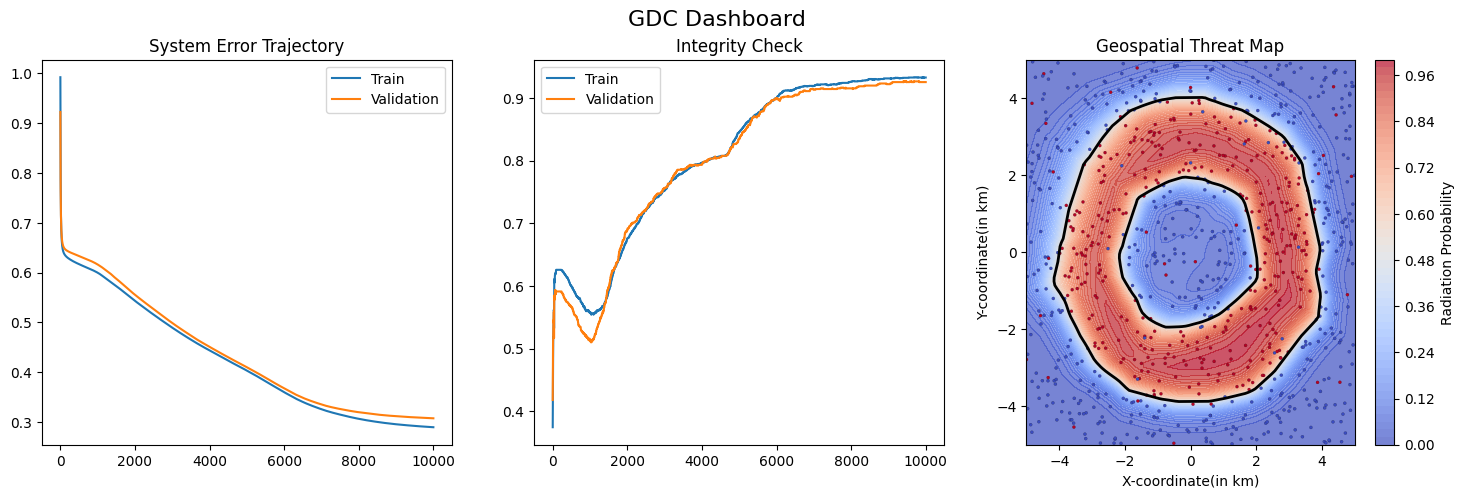

In [ ]:
# Convert training and validation datsets into torch tensor as after applying
# StandardScaler() functions it gets changed to numpy array

X_train = torch.FloatTensor(X_train)
X_valid = torch.FloatTensor(X_valid)
y_train = torch.FloatTensor(y_train)
y_valid = torch.FloatTensor(y_valid)

# Model & Training
model = MLP()
trainer = Trainer(model, lr=0.01, epochs=10000)
trainer.fit(X_train, y_train, X_valid, y_valid)

# GDC Dashboard
GDCVisualizer.plot_dashboard(trainer, model, X_valid, y_valid, scaler)


In [ ]:
# Print Final Accuracy and Loss
print(f"Final Training Accuracy: {trainer.train_acc[-1]:.4f}")
print(f"Final Validation Accuracy: {trainer.valid_acc[-1]:.4f}")

Final Training Accuracy: 0.9329
Final Validation Accuracy: 0.9256


# Does it overfit?
No \
We can observe that training and validation losses are comparable, so are the accuracies. It can also be seen from the scatter plot that the MLP training network does not overfit the dataset and also the learning rate is also  in  the safe range